<a href="https://colab.research.google.com/github/Avery1493/2019-US-Student-Loan-Debt-by-Location-and-Age/blob/master/2019_US_Student_Loan_Statistics_by_State_and_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#SITE WERE DATA CAN BE FOUND
#https://studentaid.gov/data-center/student/portfolio
#Using Portfolio by Location and Portfolio by Location and Age

In [0]:
#READING IN 2 FILES 
location = pd.read_csv('https://github.com/Avery1493/2019-US-Student-Loan-Debt-by-Location-and-Age/raw/master/Portfolio%20by%20Location.csv')
location_age = pd.read_csv('https://github.com/Avery1493/2019-US-Student-Loan-Debt-by-Location-and-Age/raw/master/Portfolio%20by%20Location%20and%20Age.csv')
location = pd.DataFrame(location)
location_age = pd.DataFrame(location_age)


In [168]:
location.head()

,Location,State,Balance (in billions),Borrowers (in thousands)
0,Alabama,AL,21.5,600.3
1,Alaska,AK,2.2,66.2
2,Arizona,AZ,28.5,836.6
3,Arkansas,AR,11.9,368.7
4,California,CA,135.0,3834.5


In [186]:
location_age.head()

,Location,State,24_or_Younger_Dollars_Outstanding,24 _Borrowers,25_to_34_Dollars_Outstanding,25 _Borrowers,35_to_49_Dollars_Outstanding,35 _Borrowers,50_to_61_Dollars_Outstanding,50 _Borrowers,62_and_Older_Dollars_Outstanding,62 _Borrowers
0,Alabama,AL,1.78,120.7,7.03,200.4,8.72,182.0,3.15,75.2,0.81,21.6
1,Alaska,AK,0.12,10.5,0.76,25.4,0.86,20.2,0.33,7.8,0.10,2.3
2,Arizona,AZ,1.75,133.9,9.33,292.4,11.55,263.1,4.51,112.4,1.37,34.5
3,Arkansas,AR,1.00,74.3,3.99,128.0,4.86,112.2,1.62,42.6,0.41,11.3
4,California,CA,9.67,700.4,50.17,1450.7,47.50,1023.5,20.74,489.7,6.88,167.4


# Overview

In [169]:
print('Total Outstanding Debt (in Trillions):',location['Balance (in billions)'].sum()/1000)

Total Outstanding Debt (in Trillions): 1.3933


In [170]:
print('Total Borrowers (in Millions):',location['Borrowers (in thousands)'].sum()/1000)

Total Borrowers (in Millions): 40.2243


In [171]:
print('Average Outstanding Debt per person(in thousands):',round(location.describe().iloc[1,0] / location.describe().iloc[1,1] * 1000,5))

Average Outstanding Debt per person(in thousands): 34.63827


# AVERAGES

In [172]:
#AVERAGING OUTSTANDING DEBT BY STATE
avg_location = location.copy()
avg_location['Average Balance (in thousands)'] = round(
    (avg_location['Balance (in billions)'] / avg_location['Borrowers (in thousands)'])*1000,2)

#SORTING IN ASCENDING ORDER
sorted_avg = avg_location.sort_values(by=['Average Balance (in thousands)'])
print(sorted_avg.head())
print(sorted_avg.tail())

        Location  ... Average Balance (in thousands)
39   Puerto Rico  ...                          25.30
34  North Dakota  ...                          28.81
51       Wyoming  ...                          28.90
15          Iowa  ...                          29.32
42  South Dakota  ...                          30.47

[5 rows x 5 columns]
                Location  ... Average Balance (in thousands)
9                Florida  ...                          37.05
47              Virginia  ...                          37.84
10               Georgia  ...                          40.18
20              Maryland  ...                          41.25
8   District of Columbia  ...                          53.59

[5 rows x 5 columns]


In [173]:
#AVERAGING OUTSTANDING DEBT BY AGE IN EACH STATE
avg_location_age = location_age.copy()

#ADDING 5 COLUMNS TO SHOW AVERAGE DEBT BALANCE PER BORROWER BY AGE RANGE IN EACH STATE
avg_location_age['24- Avg Bal (in thousands)'] = round((avg_location_age['24_or_Younger_Dollars_Outstanding'] / avg_location_age['24 _Borrowers'])*1000,2)
avg_location_age['25-34 Avg Bal (in thousands)'] = round((avg_location_age['25_to_34_Dollars_Outstanding'] / avg_location_age['25 _Borrowers'])*1000,2)
avg_location_age['35-49 Avg Bal(in thousands)'] = round((avg_location_age['35_to_49_Dollars_Outstanding'] / avg_location_age['35 _Borrowers'])*1000,2)
avg_location_age['50-61 Avg Bal (in thousands)'] = round((avg_location_age['50_to_61_Dollars_Outstanding'] / avg_location_age['50 _Borrowers'])*1000,2)
avg_location_age['62+ Avg Bal (in thousands)'] = round((avg_location_age['62_and_Older_Dollars_Outstanding'] / avg_location_age['62 _Borrowers'])*1000,2)

#DROPPING COLUMNS DONT NEED
avg_location_age = avg_location_age[['State','24- Avg Bal (in thousands)','25-34 Avg Bal (in thousands)',
                    '35-49 Avg Bal(in thousands)','50-61 Avg Bal (in thousands)',
                    '62+ Avg Bal (in thousands)']]

avg_location_age.sample(5)


,State,24- Avg Bal (in thousands),25-34 Avg Bal (in thousands),35-49 Avg Bal(in thousands),50-61 Avg Bal (in thousands),62+ Avg Bal (in thousands)
46,VT,15.34,34.47,49.71,49.46,54.84
15,IA,14.20,29.58,38.63,36.07,36.67
4,CA,13.81,34.58,46.41,42.35,41.10
49,WV,14.16,31.81,38.78,34.77,34.33
6,CT,16.41,34.51,41.84,47.00,50.57


#Percentages

In [174]:
#FINDING TOTAL OUTSTANDING DEBT BY AGE FOR WHOLE COUNTRY
per_outstanding_age = location_age.copy()

#DROPPING COLUMNS DONT NEED
per_outstanding_age = per_outstanding_age[['State',
                                           '24_or_Younger_Dollars_Outstanding',
                                           '25_to_34_Dollars_Outstanding',
                                           '35_to_49_Dollars_Outstanding',
                                           '50_to_61_Dollars_Outstanding',
                                           '62_and_Older_Dollars_Outstanding']]
#ADDING SUM ROW
per_outstanding_age1 = per_outstanding_age.append({'State': 'All Debt',
                                                   '24_or_Younger_Dollars_Outstanding' : (per_outstanding_age['24_or_Younger_Dollars_Outstanding'].sum()),
                                                   '25_to_34_Dollars_Outstanding' : (per_outstanding_age['25_to_34_Dollars_Outstanding'].sum()),
                                                   '35_to_49_Dollars_Outstanding' : (per_outstanding_age['35_to_49_Dollars_Outstanding'].sum()),
                                                   '50_to_61_Dollars_Outstanding' : (per_outstanding_age['50_to_61_Dollars_Outstanding'].sum()),
                                                   '62_and_Older_Dollars_Outstanding' : (per_outstanding_age['62_and_Older_Dollars_Outstanding'].sum())},
                                                  ignore_index=True)


#Summing All Debt in 50 states, PR, and DC
print('Sum of all debt across age ranges (in millions):',per_outstanding_age1.iloc[52,1:6].sum())
per_outstanding_age1.tail()

Sum of all debt across age ranges (in millions): 1392.8300000000002


,State,24_or_Younger_Dollars_Outstanding,25_to_34_Dollars_Outstanding,35_to_49_Dollars_Outstanding,50_to_61_Dollars_Outstanding,62_and_Older_Dollars_Outstanding
48,WA,1.72,8.93,10.13,4.04,1.19
49,WV,0.63,2.36,2.66,0.89,0.23
50,WI,2.52,8.39,7.49,2.85,0.69
51,WY,0.10,0.49,0.65,0.23,0.07
52,All Debt,120.99,496.15,502.35,213.43,59.91


In [175]:
#ADDNG ROW (Percent of debt outstanding per age range)
per_outstanding_age1 = per_outstanding_age1.append({'State': 'Debt',
                                                   '24_or_Younger_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,1] / per_outstanding_age1.iloc[52,1:6].sum()),
                                                   '25_to_34_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,2] / per_outstanding_age1.iloc[52,1:6].sum()),
                                                   '35_to_49_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,3] / per_outstanding_age1.iloc[52,1:6].sum()),
                                                   '50_to_61_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,4] / per_outstanding_age1.iloc[52,1:6].sum()),
                                                   '62_and_Older_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,5] / per_outstanding_age1.iloc[52,1:6].sum())},
                                                  ignore_index=True)
per_outstanding_age1.tail()

,State,24_or_Younger_Dollars_Outstanding,25_to_34_Dollars_Outstanding,35_to_49_Dollars_Outstanding,50_to_61_Dollars_Outstanding,62_and_Older_Dollars_Outstanding
49,WV,0.630000,2.360000,2.660000,0.890000,0.230000
50,WI,2.520000,8.390000,7.490000,2.850000,0.690000
51,WY,0.100000,0.490000,0.650000,0.230000,0.070000
52,All Debt,120.990000,496.150000,502.350000,213.430000,59.910000
53,Debt,0.086866,0.356217,0.360669,0.153235,0.043013


Of the outstanding student loan debt (1.393 Trillion)

*   borrowers 24 and younger owe 8.69%
*   25 to 34 owe 35.62% 
*   35 to 49 owe 36.07%
*   50 to 61 owe 15.32%
*   borrowers 62 and older owe 4.30%

In [176]:
#FINDING TOTAL NUMBER OF BORROWERS BY AGE FOR WHOLE COUNTRY

per_borrowers_age = location_age.copy()
#DROPPING COLUMNS DONT NEED
per_borrowers_age = per_borrowers_age.drop(['Location',
                                            '24_or_Younger_Dollars_Outstanding',
                                            '25_to_34_Dollars_Outstanding',
                                            '35_to_49_Dollars_Outstanding',
                                            '50_to_61_Dollars_Outstanding',
                                            '62_and_Older_Dollars_Outstanding'],
                                            axis=1)

#Summing number of borrowers per age
per_borrowers_age1 = per_borrowers_age.append({'State': 'All Borrowers',
                                                   '24 _Borrowers' : (per_borrowers_age['24 _Borrowers'].sum()),
                                                   '25 _Borrowers' : (per_borrowers_age['25 _Borrowers'].sum()),
                                                   '35 _Borrowers' : (per_borrowers_age['35 _Borrowers'].sum()),
                                                   '50 _Borrowers' : (per_borrowers_age['50 _Borrowers'].sum()),
                                                   '62 _Borrowers' : (per_borrowers_age['62 _Borrowers'].sum())},
                                                  ignore_index=True)
print('Sum of borrowers across age ranges (in thousands):',per_borrowers_age1.iloc[52,1:6].sum())
per_borrowers_age1.tail()

Sum of borrowers across age ranges (in thousands): 40199.700000000004


,State,24 _Borrowers,25 _Borrowers,35 _Borrowers,50 _Borrowers,62 _Borrowers
48,WA,128.0,278.0,233.1,97.4,28.6
49,WV,44.5,74.2,68.6,25.6,6.7
50,WI,170.3,267.7,182.7,72.9,17.9
51,WY,9.2,18.3,16.6,6.0,1.8
52,All Borrowers,8193.6,14444.9,11132.2,4984.4,1444.6


In [177]:
#Percent of borrowers per age range
per_borrowers_age1 = per_borrowers_age1.append({'State': 'Borrowers',
                                                   '24 _Borrowers' : (per_borrowers_age1.iloc[52,1] / per_borrowers_age1.iloc[52,1:6].sum()),
                                                   '25 _Borrowers' : (per_borrowers_age1.iloc[52,2] / per_borrowers_age1.iloc[52,1:6].sum()),
                                                   '35 _Borrowers' : (per_borrowers_age1.iloc[52,3] / per_borrowers_age1.iloc[52,1:6].sum()),
                                                   '50 _Borrowers' : (per_borrowers_age1.iloc[52,4] / per_borrowers_age1.iloc[52,1:6].sum()),
                                                   '62 _Borrowers' : (per_borrowers_age1.iloc[52,5] / per_borrowers_age1.iloc[52,1:6].sum())},
                                                  ignore_index=True)
per_borrowers_age1.tail()

,State,24 _Borrowers,25 _Borrowers,35 _Borrowers,50 _Borrowers,62 _Borrowers
49,WV,44.500000,74.200000,68.600000,25.600000,6.700000
50,WI,170.300000,267.700000,182.700000,72.900000,17.900000
51,WY,9.200000,18.300000,16.600000,6.000000,1.800000
52,All Borrowers,8193.600000,14444.900000,11132.200000,4984.400000,1444.600000
53,Borrowers,0.203822,0.359329,0.276922,0.123991,0.035936


Of the total numberr of borrowers (40.199 Million)


*   % of total borrowers that are 24 or younger 20.38%
*   25 to 34 are 35.93% 
*   35 to 49 are 27.69%
*   50 to 61 are 12.40%
*   % 62 and older are 3.59%


In [178]:
#NEW DF WITH PER OF DEBT AND BORROWERS FOR EACH AGE
percent_debt = per_outstanding_age1.iloc[52::,]
percent_debt.columns = ['State', '24', '25', '35', '50', '62']
percent_borrowers = per_borrowers_age1.iloc[52::,]
percent_borrowers.columns = ['State', '24', '25', '35', '50', '62']
percent_debt_and_borrowers = percent_debt.append(percent_borrowers)

#RESETING INDEX TO O and DROPPING PRIOR INDEX
percent_debt_and_borrowers1 = percent_debt_and_borrowers.reset_index()
percent_debt_and_borrowers1 = percent_debt_and_borrowers1.drop(columns=['index'], axis=1)

percent_debt_and_borrowers1.T

,0,1,2,3
State,All Debt,Debt,All Borrowers,Borrowers
24,120.99,0.0868663,8193.6,0.203822
25,496.15,0.356217,14444.9,0.359329
35,502.35,0.360669,11132.2,0.276922
50,213.43,0.153235,4984.4,0.123991
62,59.91,0.0430131,1444.6,0.0359356


In [179]:
#AVERAGE OUTSTANDING DEBT BY AGE RANGE
p= pd.DataFrame(percent_debt_and_borrowers1.T.iloc[1:,[0,2]])
p['Avg Debt'] = (p[0]/p[2]*1000)
p

,0,2,Avg Debt
24,120.99,8193.6,14.7664
25,496.15,14444.9,34.3478
35,502.35,11132.2,45.1259
50,213.43,4984.4,42.8196
62,59.91,1444.6,41.4717


# Visualizations

In [0]:
#AVG DEBT PER BORROWER BY STATE (EXCLUDING PR and DC)
sorted_avg1 = sorted_avg.drop([39,8])
sorted_avg1 = sorted_avg1[['State','Average Balance (in thousands)']]

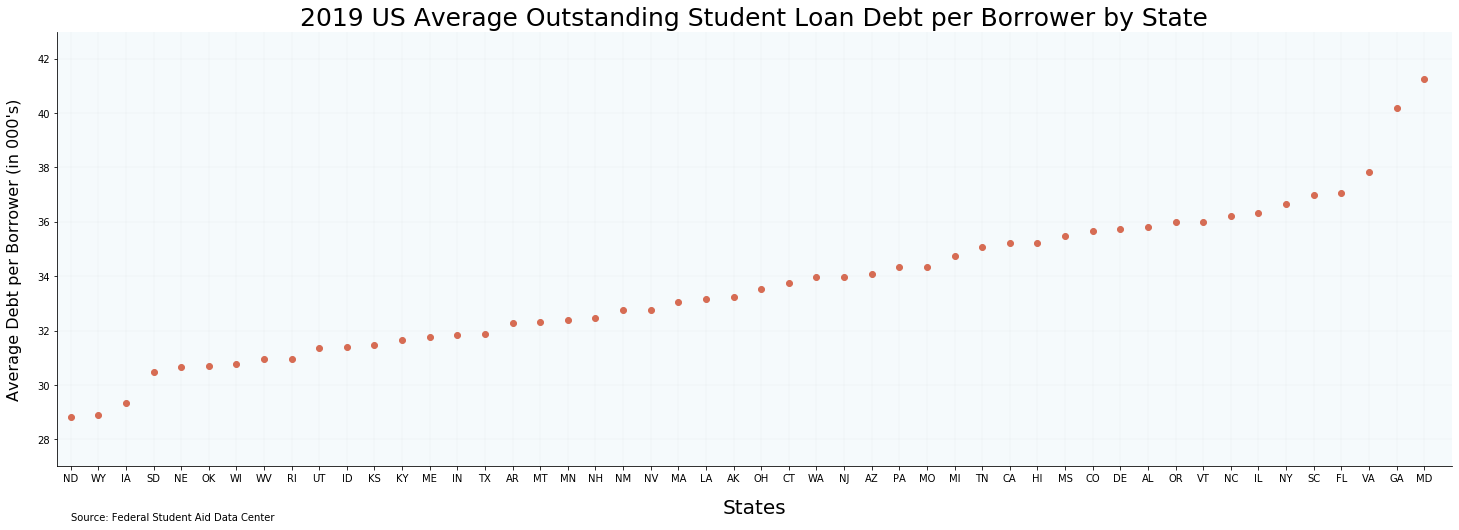

In [181]:
#PLOTTING STATE VS AVERAGE DEBT OUSTANDING PER BORROWER IN ASCENDING ORDER
fig,ax = plt.subplots(figsize=(25,8))
ax.set_facecolor('#f5fafc')
plt.scatter(sorted_avg1['State'],sorted_avg1['Average Balance (in thousands)'],
            c='#D76B52', marker='o')
plt.ylim(27,43)
plt.xlim(-.5,50)
plt.title('2019 US Average Outstanding Student Loan Debt per Borrower by State', fontsize=25)
plt.xlabel('States', size=20, labelpad=15)
plt.ylabel("Average Debt per Borrower (in 000's)", size=16, labelpad=15)
plt.savefig('scatter.png',dpi=400)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth='0.1')
plt.text(0,25,'Source: Federal Student Aid Data Center')
plt.savefig('scatter.png',dpi=800)
plt.show();

In [182]:
#AVERAGE OUTSTANDING DEBT BY AGE RANGE
debt_by_age = pd.DataFrame(p['Avg Debt'])
debt_by_age

,Avg Debt
24,14.7664
25,34.3478
35,45.1259
50,42.8196
62,41.4717


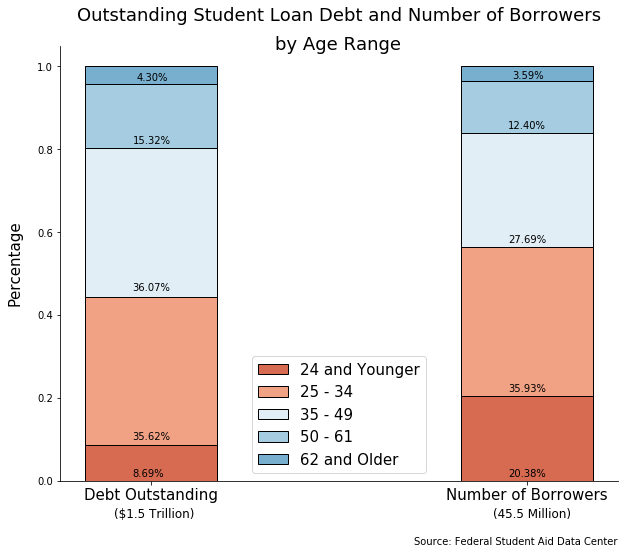

In [183]:
fig,ax = plt.subplots(figsize=(10,8))

N = 2 # NUMBER OF BARS (one for % of debt, and % of borrowers per age)
p24 = percent_debt_and_borrowers1.T.iloc[1,[1,3]] #selecting %debt and %borrowers 24 and younger
p25 = percent_debt_and_borrowers1.T.iloc[2,[1,3]]
p35 = percent_debt_and_borrowers1.T.iloc[3,[1,3]]
p50 = percent_debt_and_borrowers1.T.iloc[4,[1,3]]
p62 = percent_debt_and_borrowers1.T.iloc[5,[1,3]]

ind = np.arange(N)
width = .35

#Stacking bar at y coordinate
p1 = plt.bar(ind, p24, width, color = '#D76B52', edgecolor='black')
p2 = plt.bar(ind, p25, width, bottom=p24, color = '#F1A285', edgecolor='black') 
p3 = plt.bar(ind, p35, width, bottom=p24 + p25,
             color ='#E1EEF6', edgecolor='black') 
p4 = plt.bar(ind, p50, width, bottom=p24 + p25 + p35,
             color = '#A5CCE0', edgecolor='black')
p5 = plt.bar(ind, p62, width, bottom=p24 + p25 + p35 + p50,
             color = '#78AFCE', edgecolor='black')

#TITLES and LABELS
plt.title('Outstanding Student Loan Debt and Number of Borrowers',
          size=18, pad=25)
plt.text(.33, 1.04,'by Age Range', fontsize = 18)
plt.ylabel('Percentage', size=15, labelpad=15)
plt.xticks(ind, ('Debt Outstanding', 'Number of Borrowers'), size = 15)
plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('24 and Younger', '25 - 34',
                                              '35 - 49','50 - 61',
                                              '62 and Older'),prop={'size': 15})
#BAR TEXT
x=['8.69%','35.62%','36.07%','15.32%','4.30%']
y=['20.38%','35.93%','27.69%','12.40%','3.59%']
plt.text(-.05,.01,s= x[0])
plt.text(-.05,.10,s= x[1])
plt.text(-.05,.46,s= x[2])
plt.text(-.05,.815,s= x[3])
plt.text(-.04,.965,s= x[4])
#second bar
plt.text(.95,.01,s= y[0])
plt.text(.95,.215,s= y[1])
plt.text(.95,.575,s= y[2])
plt.text(.95,.85,s= y[3])
plt.text(.96,.97,s= y[4])

#BELOW GRAPH TEXT
plt.text(-.1,-.09,'($1.5 Trillion)', size=12)
plt.text(.91,-.09,'(45.5 Million)', size=12)
plt.text(.7,-.155,'Source: Federal Student Aid Data Center')


#SPINES OFF
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('bar.png',dpi=400)
plt.show()

In [184]:
#Removing all but 24 and younger age range
avg_location_24 = avg_location_age.copy()
avg_location_24 = avg_location_24.drop(columns=['25-34 Avg Bal (in thousands)',
                                                '35-49 Avg Bal(in thousands)',
                                                '50-61 Avg Bal (in thousands)',
                                                '62+ Avg Bal (in thousands)'])
avg_location_24.sample(5)

,State,24- Avg Bal (in thousands)
3,AR,13.46
4,CA,13.81
31,NM,11.29
26,MT,12.72
36,OK,12.80


In [191]:
'''
import chart_studio
username='Avery1493'
api_key = '0LM4OKdaZTXSmKIgCrqD'

chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

import chart_studio.plotly as py
import chart_studio.tools as tls

import plotly.graph_objects as go
'''
df = avg_location_24

fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['24- Avg Bal (in thousands)'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rdbu',
    colorbar_title = "Thousands USD",
))

fig.update_layout(
    title_text = 'Average Student Loan Debt per State by Borrowers 24 Years and Younger',
    geo_scope='usa', # limit map scope to USA
)

# py.plot(fig, filename = 'Student Loan Debt 24 and Younger', auto_open=False)

fig.show()